# Exercise: Visas over time

#### Summary

Find out how visas issued by the US have changed over time.

#### Data Source(s)

Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+, https://travel.state.gov/content/visas/en/law-and-policy/statistics/non-immigrant-visas.html

#### Files

- FYs97-16_NIVDetailTable.xls, "Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+"

#### Skills

- Excel files with multiple sheets
- Combining multiple dataframes
- Filling in null values (filling down)
- Dropping and filtering rows
- Renaming columns
- Looping to clean a sheet
- Customizing matplotlib graphs

# Read in FYs97-16_NIVDetailTable.xls, but only the 1999 data

In [118]:
import pandas as pd 

df = pd.read_excel("FYs97-16_NIVDetailTable.xls", sheetname = 'FY99')

## Look at the first couple rows to confirm it's the 1999 data

Don't worry that it's missing a lot of data yet.

In [119]:
df.head()

,Fiscal Year 1999,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0


## Confirm that you have 90 columns and 217 rows

In [120]:
df.shape

(217, 90)

## List all of the columns and their datatype

You'll need to change a pandas display option to make sure you can see all of them. **Make sure there is not a `...` in the middle**.

In [121]:
df.dtypes

Fiscal Year 1999     object
A-1                 float64
A-2                 float64
A-3                 float64
B-1                 float64
B-1,2               float64
B-2                 float64
B-1,2/BCC           float64
B-1,2/BCV           float64
C-1                 float64
C-1/D               float64
C-2                 float64
C-3                 float64
D                   float64
D-CREW              float64
E-1                 float64
E-2                 float64
E-3                 float64
E-3D                float64
E-3R                float64
F-1                 float64
F-2                 float64
F-3                 float64
G-1                 float64
G-2                 float64
G-3                 float64
G-4                 float64
G-5                 float64
H-1A                float64
H-1B                float64
                     ...   
O-3                 float64
P-1                 float64
P-2                 float64
P-3                 float64
P-4                 

## Rename the "Fiscal Year 1999" row to be "Country"

In [122]:
df.rename(columns = {'Fiscal Year 1999':'Country'}, inplace = True)

## Look at the first 2 rows to make sure you renamed it correctly

In [123]:
df.head(2)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0


# Finding the dirty data

Usually we clean up columns with bad data, but this time **it's the rows that are bad**.

## Look at the first five rows. How can you identify the "bad" row?

There is one near the top and a few near the bottom.

In [124]:
df.head(5)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0


## Find all of the "bad" rows based on what you decided was unique about the "bad" row

You should get **14 rows and 90 columns**.

In [125]:
df[df['BCC'].isnull()]

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Is there a column for continent? How do you know what continent a country is in?

It's probably easiest to see this in Excel. Don't edit it in Excel, though!

In [126]:
# no 

## Cleaning up the data

We have several types of rows that we don't like:

- Headers for continents ("Africa," "Europe," etc)
- Totals for continents ("Totals for Africa," "Totals for Europe," etc.)
- The empty lines between continent sections

But we *do*! We're going to do a **three step process**:

1. Create a new "continent" column for each of the header rows
2. Copy that value down into all of the columns below it
3. Delete the header/total/space rows

### STEP 1: For each continent header row, add a new column called `continent` with the value of the continent

> If you get the warning `A value is trying to be set on a copy of a slice from a DataFrame`, let's talk about it, because it means your code didn't work!

In [127]:
df.loc[df['Grand Total'].isnull(), 'Continent'] = df['Country']

## STEP 1 CONFIRMATION

Take a look at our data, make sure it looks right!

In [128]:
df.head()

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,NaN
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,NaN
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,NaN
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,NaN


## STEP 2: Filling down

Use pandas to take that continent value and "copy it down" through the null values. So it might start off looking like this...

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|NaN|
|Angola|2843.0|NaN|
|Asia|NaN|Asia|
|Afghanistan|2217.0|NaN|
|Bahrain|2502.0|NaN|

and then look like this:

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|**Africa**|
|Angola|2843.0|**Africa**|
|Asia|NaN|Asia|
|Afghanistan|2217.0|**Asia**|
|Bahrain|2502.0|**Asia**|

In [129]:
df['Continent'].fillna(method = 'ffill', inplace = True)
df.head()

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa


## STEP 2 CONFIRMATION

Check how many rows of each continent exist in the dataset. **Europe and Africa should both have 56.**

In [130]:
df['Continent'].value_counts()

Africa           56
Europe           56
Asia             42
North America    25
Oceania          17
South America    15
Unknown           6
Name: Continent, dtype: int64

## STEP 3: Deleting the bad rows

### Delete the rows where "Grand Total" is missing

- Tip: There are multiple ways to do this! I can tell you them!

In [131]:
df = df[df['Grand Total'].notnull()]
df

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,232.0,Africa
10,Chad,17.0,75.0,1.0,37.0,145.0,144.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,591.0,0.0,591.0,Africa


### Look at the first 55 rows to be sure it worked

In [132]:
df.head(55)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,232.0,Africa
10,Chad,17.0,75.0,1.0,37.0,145.0,144.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,591.0,0.0,591.0,Africa


### Delete the rows where "Country" has "Totals"

Now that we have the "Continent" column we can calculate totals with a groupby.

- Tip: There are multiple ways to do this, but only one best way to do it! It probably isn't the same as the last question.

In [133]:
df = df[df['Country'].str.contains('Total') == False]
df

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,232.0,Africa
10,Chad,17.0,75.0,1.0,37.0,145.0,144.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,591.0,0.0,591.0,Africa


## Confirm your cleanup worked

Check to make sure you have 195 rows and 90 columns

In [134]:
df.shape

(195, 91)

# Making a few graphs

Create a bar graph of the top 10 countries that visas are from

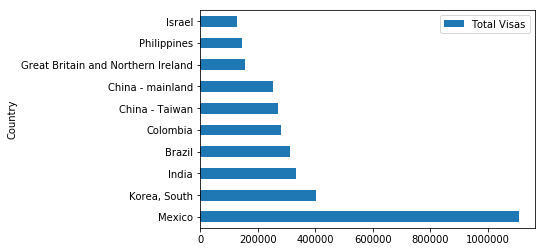

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = df.sort_values(by = 'Total Visas', ascending = False).head(10).plot(kind = 'barh', x='Country', y = 'Total Visas')
ax

## Clean up that graph!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add commas for the number axis

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
```

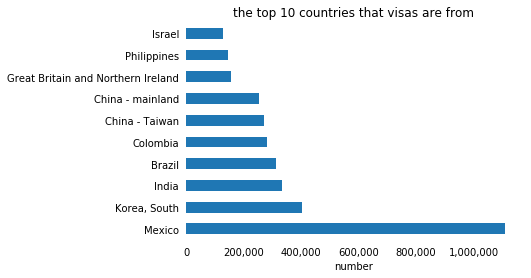

In [136]:
ax = df.sort_values(by = 'Total Visas', ascending = False).head(10).plot(legend=False,kind = 'barh', x='Country', y = 'Total Visas')
ax

import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title('the top 10 countries that visas are from')
ax.set_xlabel('number')
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    left = 'off')       # ticks along the top edge are off

ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

## Create a bar graph of the total number of F-1 visas from each continent

And make it look nice!

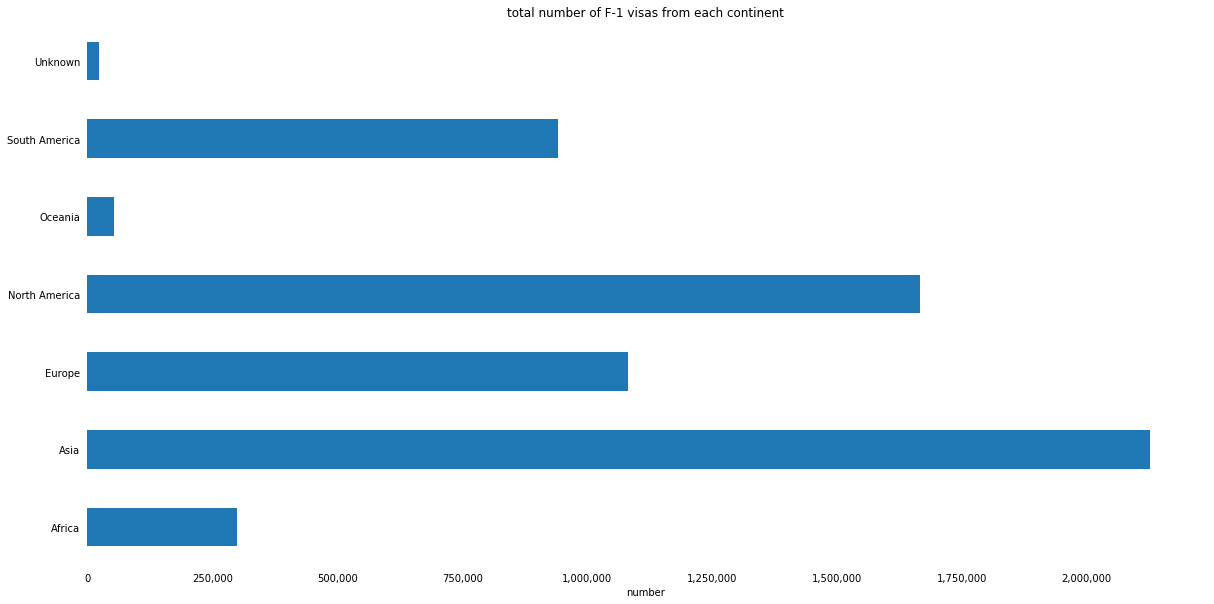

In [137]:
ax2 = df.groupby('Continent')['Total Visas'].sum().plot(legend=False,kind = 'barh', x='Continent', y = 'Total Visas',figsize=(20,10))
ax2

ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.set_title('total number of F-1 visas from each continent')
ax2.set_xlabel('number')
ax2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    left = 'off')       # ticks along the top edge are off

ax2.set_ylabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Read in the data from 2000-2016

They should each be in a separate dataframe.

- Tip: Maybe I have quicker ways to do this?

In [138]:
sheetnames = [
    'FY97', 'FY98', 'FY99', 'FY00', 'FY01', 'FY02', 'FY03', 'FY04', 'FY05', 'FY06',
    'FY07', 'FY08', 'FY09', 'FY10', 'FY11', 'FY12', 'FY13', 'FY14', 'FY15', 'FY16'
]

In [140]:
list_of_dfs = [pd.read_excel("FYs97-16_NIVDetailTable.xls", sheetname=sheet) for sheet in sheetnames]

# Clean them up, just like you did with the 1999 data

## STEP 1: For each of the dataframes, rename the "Fiscal Year XXXX" column as "Country"

- Tip: What does the code down below give you?

```python
df.columns.str.replace('Fiscal Year.*', 'Country')
```

- Tip: Is there another way to rename columns besides `.rename`?
- Tip: Use a for loop

In [163]:
for df in list_of_dfs:
    df.columns = df.columns.str.replace('Fiscal Year.*', 'Country')
    
    print(df.head())



    Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1   Algeria  62.0   23.0  5.0  1661.0   507.0  3430.0        0.0        0.0   
2    Angola  54.0  169.0  3.0    10.0  1421.0   271.0        1.0        0.0   
3     Benin  10.0   43.0  4.0   104.0   375.0   249.0        0.0        0.0   
4  Botswana  10.0   79.0  1.0     2.0   366.0    54.0        0.0        0.0   

    C-1     ...       U-1  U-2  U-3  U-4  V-1  V-2  V-3  Total Visas    BCC  \
0   NaN     ...       NaN  NaN  NaN  NaN  NaN  NaN  NaN          NaN    NaN   
1  57.0     ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0       6386.0  492.0   
2  10.0     ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0       2397.0    4.0   
3  37.0     ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0       1105.0   10.0   
4   3.0     ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0        850.0    0.0   

   Grand Total  
0          NaN  
1       6878.0  

    Country   A-1    A-2   A-3     B-1   B-1,2     B-2  B-1,2/BCC   C-1  \
0    Africa   NaN    NaN   NaN     NaN     NaN     NaN        NaN   NaN   
1   Algeria  42.0  188.0   3.0  1178.0   857.0  1575.0        0.0  12.0   
2    Angola  94.0  104.0  11.0   309.0  1664.0   331.0        0.0  17.0   
3     Benin  24.0  133.0   0.0    30.0   851.0    80.0        0.0   7.0   
4  Botswana   7.0   72.0   5.0     3.0   715.0    36.0        0.0  10.0   

   C-1/D     ...       U-1  U-2  U-3  U-4  V-1  V-2  V-3  Total Visas  BCC  \
0    NaN     ...       NaN  NaN  NaN  NaN  NaN  NaN  NaN          NaN  NaN   
1    0.0     ...       0.0  0.0  0.0  0.0  1.0  3.0  0.0       4614.0  0.0   
2  114.0     ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0       3342.0  0.0   
3    0.0     ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0       1497.0  0.0   
4    3.0     ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0       1089.0  0.0   

   Grand Total  
0          NaN  
1       4614.0  
2       3342.0  
3       1497

## STEP 2: Add the 'Continent' Column and get rid of the bad rows

The code below will drop any column where 'Country' has 'Totals for' in it. The trick we used above won't work because we're in a list.

```python
df.drop(df.index[df['Country'].str.contains("Totals for", na=False)])
```

In [170]:
for df in list_of_dfs:
    df.loc[df['Grand Total'].isnull(), 'Continent'] = df['Country']
    df['Continent'].fillna(method = 'ffill', inplace = True)
    df.drop(df.index[df['Country'].str.contains("Totals for", na=False)])
    print(df.head(5))
    

    Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1   Algeria  62.0   23.0  5.0  1661.0   507.0  3430.0        0.0        0.0   
2    Angola  54.0  169.0  3.0    10.0  1421.0   271.0        1.0        0.0   
3     Benin  10.0   43.0  4.0   104.0   375.0   249.0        0.0        0.0   
4  Botswana  10.0   79.0  1.0     2.0   366.0    54.0        0.0        0.0   

    C-1    ...      U-2  U-3  U-4  V-1  V-2  V-3  Total Visas    BCC  \
0   NaN    ...      NaN  NaN  NaN  NaN  NaN  NaN          NaN    NaN   
1  57.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       6386.0  492.0   
2  10.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       2397.0    4.0   
3  37.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       1105.0   10.0   
4   3.0    ...      0.0  0.0  0.0  0.0  0.0  0.0        850.0    0.0   

   Grand Total  Continent  
0          NaN     Africa  
1       6878.0     Africa  
2       

    Country   A-1    A-2  A-3     B-1  B-1,2    B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN     NaN    NaN    NaN        NaN        NaN   
1   Algeria  44.0  163.0  1.0  1253.0  989.0  916.0        0.0        0.0   
2    Angola  79.0  100.0  6.0   822.0  788.0  631.0        0.0        0.0   
3     Benin   5.0  100.0  0.0    25.0  718.0   42.0        0.0        0.0   
4  Botswana  23.0   68.0  3.0     0.0  972.0   10.0        0.0        0.0   

    C-1    ...      U-2  U-3  U-4  V-1  V-2  V-3  Total Visas  BCC  \
0   NaN    ...      NaN  NaN  NaN  NaN  NaN  NaN          NaN  NaN   
1  11.0    ...      0.0  0.0  0.0  0.0  1.0  0.0       4075.0  0.0   
2  32.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       3240.0  0.0   
3   8.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       1268.0  0.0   
4  20.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       1385.0  0.0   

   Grand Total  Continent  
0          NaN     Africa  
1       4075.0     Africa  
2       3240.0     Africa  
3   

    Country   A-1    A-2  A-3   B-1   B-1,2    B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN   NaN     NaN    NaN        NaN        NaN   
1   Algeria  55.0  462.0  1.0  85.0  7329.0   51.0        0.0        0.0   
2    Angola  78.0  142.0  0.0  36.0  6363.0  841.0        0.0        0.0   
3     Benin  20.0   78.0  0.0   9.0  1162.0   15.0        0.0        0.0   
4  Botswana  15.0   42.0  0.0   0.0   772.0    2.0        0.0        0.0   

    C-1    ...      U-3  U-4  U-5  V-1  V-2  V-3  Total Visas  BCC  \
0   NaN    ...      NaN  NaN  NaN  NaN  NaN  NaN          NaN  NaN   
1  10.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       8774.0  0.0   
2   5.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       9091.0  0.0   
3   3.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       1598.0  0.0   
4  31.0    ...      0.0  0.0  0.0  0.0  0.0  0.0       1129.0  0.0   

   Grand Total  Continent  
0          NaN     Africa  
1       8774.0     Africa  
2       9091.0     Africa  
3       15

## STEP 3: Add the year to each dataframe

We can't combine them yet because you need to be able to separate them. Use the code below to get close.

```python
for sheet_df, fiscal_year in zip(sheets, sheetnames):
    sheet_df['year'] = fiscal_year
```

In [176]:
for df, fiscal_year in zip(list_of_dfs[:3], sheetnames[:3]):
    df['year'] = '19'+fiscal_year[2:]
    print(df.head())

    Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1   Algeria  62.0   23.0  5.0  1661.0   507.0  3430.0        0.0        0.0   
2    Angola  54.0  169.0  3.0    10.0  1421.0   271.0        1.0        0.0   
3     Benin  10.0   43.0  4.0   104.0   375.0   249.0        0.0        0.0   
4  Botswana  10.0   79.0  1.0     2.0   366.0    54.0        0.0        0.0   

    C-1  ...   U-3  U-4  V-1  V-2  V-3  Total Visas    BCC  Grand Total  \
0   NaN  ...   NaN  NaN  NaN  NaN  NaN          NaN    NaN          NaN   
1  57.0  ...   0.0  0.0  0.0  0.0  0.0       6386.0  492.0       6878.0   
2  10.0  ...   0.0  0.0  0.0  0.0  0.0       2397.0    4.0       2401.0   
3  37.0  ...   0.0  0.0  0.0  0.0  0.0       1105.0   10.0       1115.0   
4   3.0  ...   0.0  0.0  0.0  0.0  0.0        850.0    0.0        850.0   

   Continent  year  
0     Africa  1997  
1     Africa  1997  
2     Afric

In [177]:
for df, fiscal_year in zip(list_of_dfs[3:], sheetnames[3:]):
    df['year'] = '20'+fiscal_year[2:]
    print(df.head())

    Country   A-1   A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN   NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1   Algeria  39.0  58.0  3.0  1851.0  1781.0  2121.0        0.0        0.0   
2    Angola  67.0  87.0  3.0    35.0  2374.0   102.0        0.0        0.0   
3     Benin  66.0  87.0  5.0    35.0   813.0    97.0        0.0        0.0   
4  Botswana  16.0  88.0  1.0     4.0   594.0   266.0        0.0        0.0   

    C-1  ...   U-3  U-4  V-1  V-2  V-3  Total Visas  BCC  Grand Total  \
0   NaN  ...   NaN  NaN  NaN  NaN  NaN          NaN  NaN          NaN   
1  30.0  ...   0.0  0.0  0.0  0.0  0.0       6685.0  0.0       6685.0   
2  45.0  ...   0.0  0.0  0.0  0.0  0.0       3529.0  0.0       3529.0   
3   9.0  ...   0.0  0.0  0.0  0.0  0.0       1481.0  0.0       1481.0   
4   3.0  ...   0.0  0.0  0.0  0.0  0.0       1387.0  0.0       1387.0   

   Continent  year  
0     Africa  2000  
1     Africa  2000  
2     Africa  2000  
3     Af

    Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1   Algeria  53.0  159.0  0.0  1618.0  1326.0  2543.0        0.0        0.0   
2    Angola  82.0  131.0  3.0   373.0  2501.0   555.0        0.0        0.0   
3     Benin  32.0   58.0  2.0     7.0  1053.0    16.0        0.0        0.0   
4  Botswana  11.0   81.0  4.0     9.0   798.0     7.0        0.0        0.0   

    C-1  ...   U-3  U-4  V-1  V-2  V-3  Total Visas  BCC  Grand Total  \
0   NaN  ...   NaN  NaN  NaN  NaN  NaN          NaN  NaN          NaN   
1  13.0  ...   0.0  0.0  0.0  0.0  0.0       6581.0  0.0       6581.0   
2  15.0  ...   0.0  0.0  0.0  0.0  0.0       4632.0  0.0       4632.0   
3   6.0  ...   0.0  0.0  0.0  0.0  0.0       1566.0  0.0       1566.0   
4  15.0  ...   0.0  0.0  0.0  0.0  0.0       1226.0  0.0       1226.0   

   Continent  year  
0     Africa  2009  
1     Africa  2009  
2     Africa  2009  
3 

# Combining the dataframes into one big dataframe

Combine them, confirming the result has 4464 rows and 96 columns

- Tip: don't use .merge!

In [173]:
combined_df = pd.concat(list_of_dfs, ignore_index=True)

## A little cleaning

Replace FY97 with 1997, FY98 with 1998, FY99 with FY1999, FY00 with 2000, etc.

- Tip: You could do this in a fancy way using extract or loops or who knows what but honestly .replace might be fastest!

# A little graphing

## Graph the number of visas granted to Colombia over time

Make it look nice!

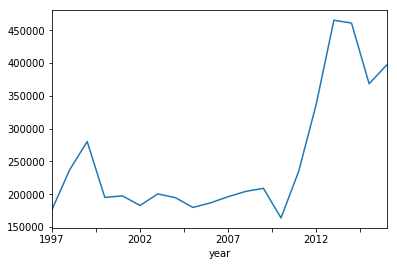

In [195]:
list_of_colombia = []
for df in list_of_dfs:
    df = df[df['Country'] == 'Colombia']
    list_of_colombia.append(df)
    
df_colombia = pd.concat(list_of_colombia, ignore_index=True)
    
df_colombia.plot(legend=False, x='year', y = 'Total Visas')


## How about Iraq?

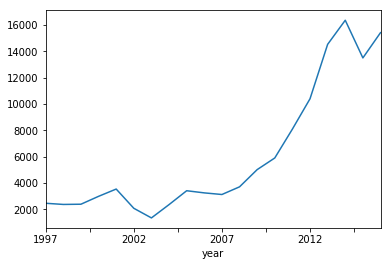

In [197]:
list_of_iraq = []
for df in list_of_dfs:
    df = df[df['Country'] == 'Iraq']
    list_of_iraq.append(df)
    
df_iraq = pd.concat(list_of_iraq, ignore_index=True)
    
df_iraq.plot(legend=False, x='year', y = 'Total Visas')

## Mexico?

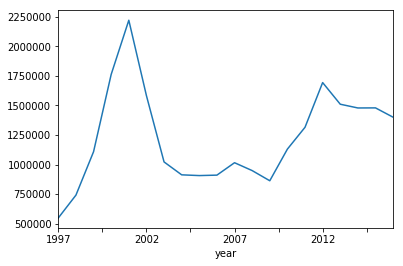

In [199]:
list_of_mexico = []
for df in list_of_dfs:
    df = df[df['Country'] == 'Mexico']
    list_of_mexico.append(df)
    
df_mexico = pd.concat(list_of_mexico, ignore_index=True)
    
df_mexico.plot(legend=False, x='year', y = 'Total Visas')